# 1 Load and dispaly the image 

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
# laod the image
img = cv.imread(r"Images\dahi.png")

cv.imshow("Original Image", img) # it will display the image

cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
# converting image into grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Grayscale Image", gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# display the dimension of the original image
height, width, channels = img.shape

print("Image Height", height)
print("Image Width", width)
print("Number of channesl", channels)

Image Height 412
Image Width 600
Number of channesl 3


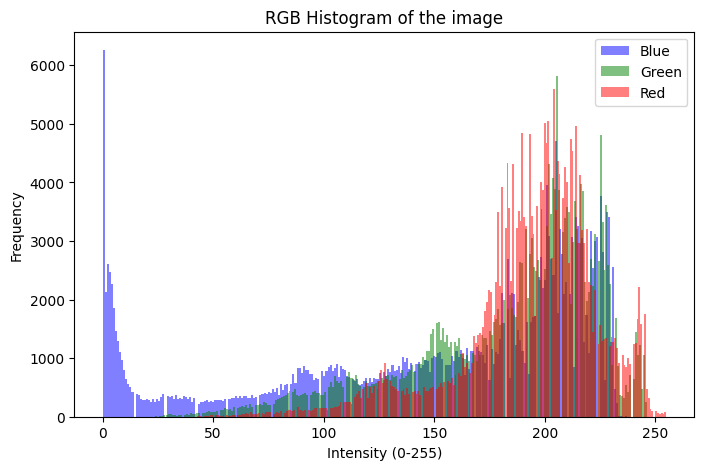

In [8]:
b, g, r = cv.split(img)

plt.figure(figsize=(8, 5))

# blue channel 
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')

#Green Channel 
plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')

# Red Channel
plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')

plt.title("RGB Histogram of the image")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

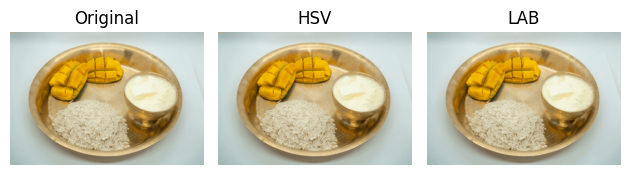

In [10]:
# converting to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Converting to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# converting bgr to rgb 
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv_img = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
lab_img = cv.cvtColor(lab, cv.COLOR_Lab2RGB)

# 1. Original 
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

# 2. HSV 
plt.subplot(1, 3, 2)
plt.imshow(hsv_img)
plt.title("HSV")
plt.axis('off')

# 3. LAB
plt.subplot(1, 3, 3)
plt.imshow(lab_img)
plt.title("LAB")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Applying Gaussian Blur
blur_3 = cv.GaussianBlur(img, (3,3), 0) # (3, 3)-> It means small blur
blur_5 = cv.GaussianBlur(img, (5, 5))
cv.imshow("Gaussian Blur", blur_3)

cv.waitKey(0)


-1